In [21]:
import pandas as pd
dataset = pd.read_csv('retail_dataset.csv', delimiter=';')

C:\Users\user\AppData\Local\Temp\ipykernel_10356\2156379879.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('retail_dataset.csv', delimiter=';')


In [22]:
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [26]:
# Changing datatypes as per data description
dataset['Date'] = dataset['Date'].astype('datetime64[ns]')
dataset['Price'] = dataset['Price'].astype('Float64')
dataset['CustomerID'] = dataset['CustomerID'].astype('object')

ValueError: could not convert string to float: '2,55'

In [ ]:
dataset.groupby('BillNo')

# dataset = [
#     ['milk', 'bread', 'butter'],
#     ['bread', 'butter'],
#     ['milk', 'bread'],
#     ['milk', 'butter'],
#     ['bread', 'butter']
# ]


In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the transactions to a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)


   support         itemsets
0      0.8          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)


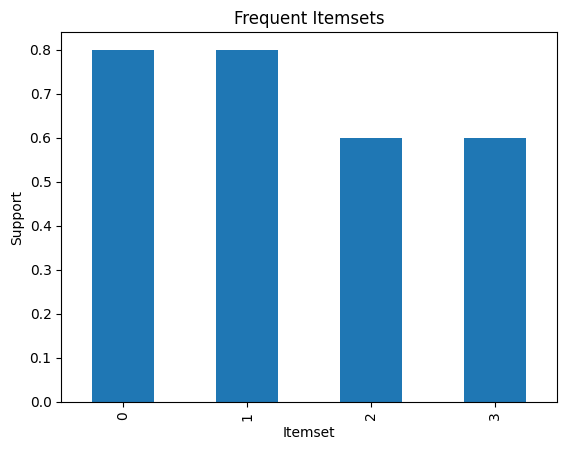

In [10]:
import matplotlib.pyplot as plt

frequent_itemsets['support'].plot(kind='bar')
plt.title('Frequent Itemsets')
plt.xlabel('Itemset')
plt.ylabel('Support')
plt.show()


In [14]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.8                 0.8      0.6   
1     (bread)    (butter)                 0.8                 0.8      0.6   

   confidence    lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  0.9375               1.0     -0.04         0.8          -0.25   
1        0.75  0.9375               1.0     -0.04         0.8          -0.25   

   jaccard  certainty  kulczynski  
0      0.6      -0.25        0.75  
1      0.6      -0.25        0.75  


In [17]:
# Filter rules where the confidence is above 0.5
strong_rules = rules[rules['confidence'] > 0.5]
print(strong_rules)


  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.8                 0.8      0.6   
1     (bread)    (butter)                 0.8                 0.8      0.6   

   confidence    lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  0.9375               1.0     -0.04         0.8          -0.25   
1        0.75  0.9375               1.0     -0.04         0.8          -0.25   

   jaccard  certainty  kulczynski  
0      0.6      -0.25        0.75  
1      0.6      -0.25        0.75  


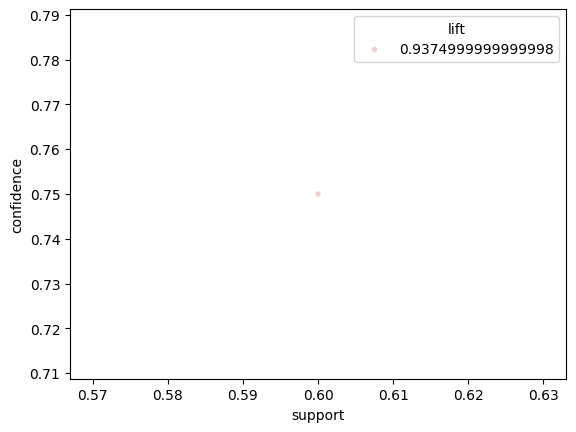

In [18]:
import seaborn as sns

sns.scatterplot(data=strong_rules, x='support', y='confidence', size='lift', hue='lift')
plt.show()


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
Pearson Correlation Matrix:
                age  income  purchase_count
age             1.0     1.0             1.0
income          1.0     1.0             1.0
purchase_count  1.0     1.0             1.0


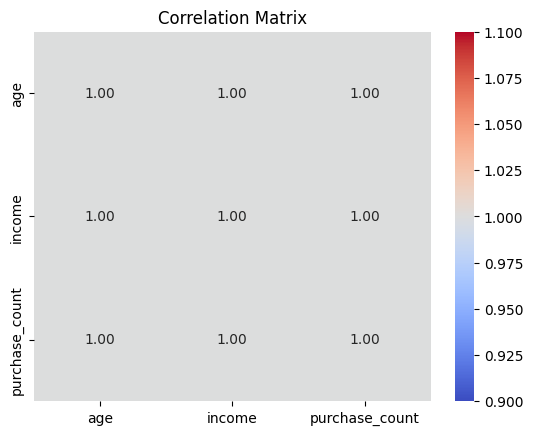

In [19]:
# Step 1: Frequent Itemset Mining (Apriori)
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset of transactions
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter']
]

# One-hot encoding the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Applying the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Step 2: Generating Association Rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
print(rules)

# Step 3: Correlation Analysis (Using a sample customer data)
import pandas as pd

# Sample data for customer demographics
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45],
    'income': [40000, 50000, 60000, 70000, 80000],
    'purchase_count': [5, 6, 7, 8, 9]
})

# Pearson correlation
corr_matrix = data.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(corr_matrix)

# Visualizing the correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
